## WorkFlow

### [Fitness data](https://www.kaggle.com/datasets/moathmohamed/fitness-data)


### Pre-Processing & Analyasis

### Modelling

### Evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('exercise.csv')
df2 = pd.read_csv('calories.csv')

In [3]:
df1.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8


In [4]:
df2.head(1)

,User_ID,Calories
0,14733363,231.0


In [5]:
df1['Calories'] = df2['Calories'].values

In [6]:
df = df1.copy()

In [7]:
del df2
del df1

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df.shape

(15000, 9)

In [10]:
df['Gender'] = df['Gender'].map({'female':0, 'male':1}).values

In [11]:
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
df.isnull().sum().sum()

0

In [13]:
corr = df.corr()

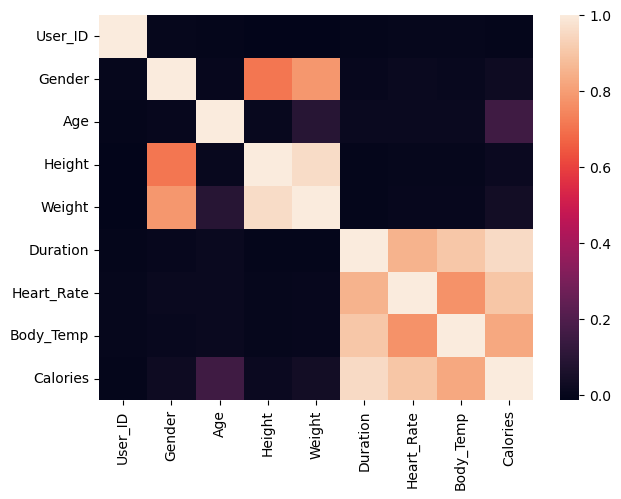

In [14]:
fig = plt.figure(figsize=(7,5))
fig = sns.heatmap(corr, )

C:\Users\2022\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


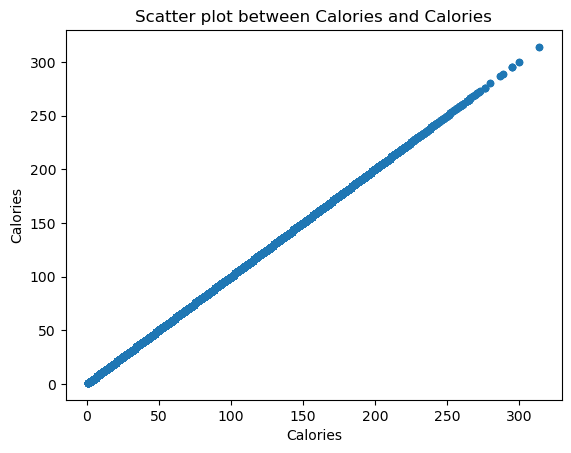

C:\Users\2022\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


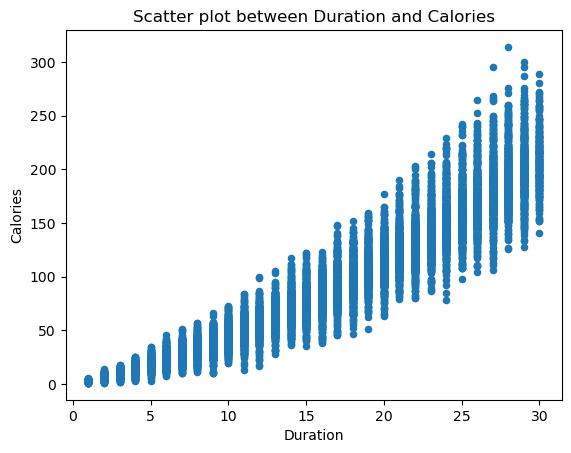

C:\Users\2022\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


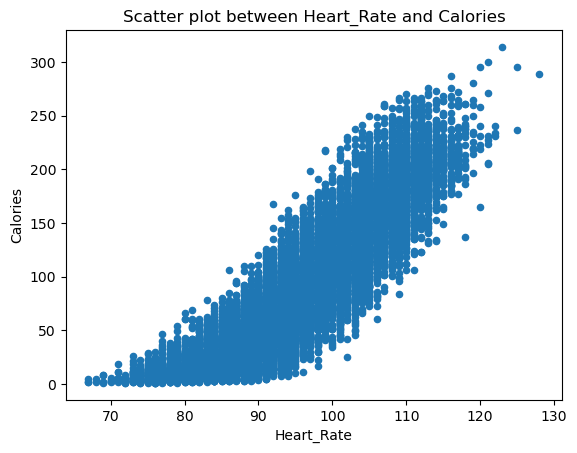

C:\Users\2022\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


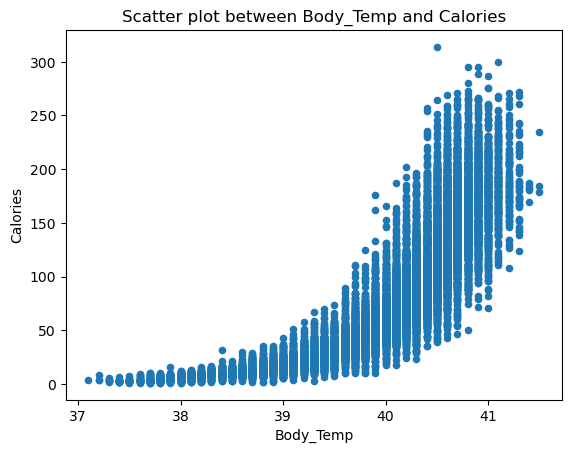

In [18]:
most_corr = corr.nlargest(4,'Calories')['Calories'].index
for i in most_corr : 
    df[['Calories' , i]].plot.scatter(x=i, y='Calories',)
    plt.title(f'Scatter plot between {i} and Calories')
    plt.xlabel(i)
    plt.ylabel('Calories')
    plt.show()

In [20]:
X = df.drop('Calories' , axis=1)
y = df['Calories'].values

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X2 = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X2,y , test_size = 0.3, random_state = 4)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 150, learning_rate = 1.5, max_depth = 3)

In [24]:
model.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=1.5, n_estimators=150)

In [25]:
ypred = model.predict(xtest)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

MSE = mean_squared_error(ytest,ypred)
RMSE = np.sqrt(MSE)
R2 = r2_score(ytest,ypred)

MSE = round(MSE , 4)
RMSE = round(RMSE , 4)
R2 = round(R2 , 4)

print('Mean Square Error : {}'.format(MSE))
print('Root Mean Square Error : {}'.format(RMSE))
print('R2 Score : {}%'.format(R2*100))

Mean Square Error : 25.1629
Root Mean Square Error : 5.0163
R2 Score : 99.36%


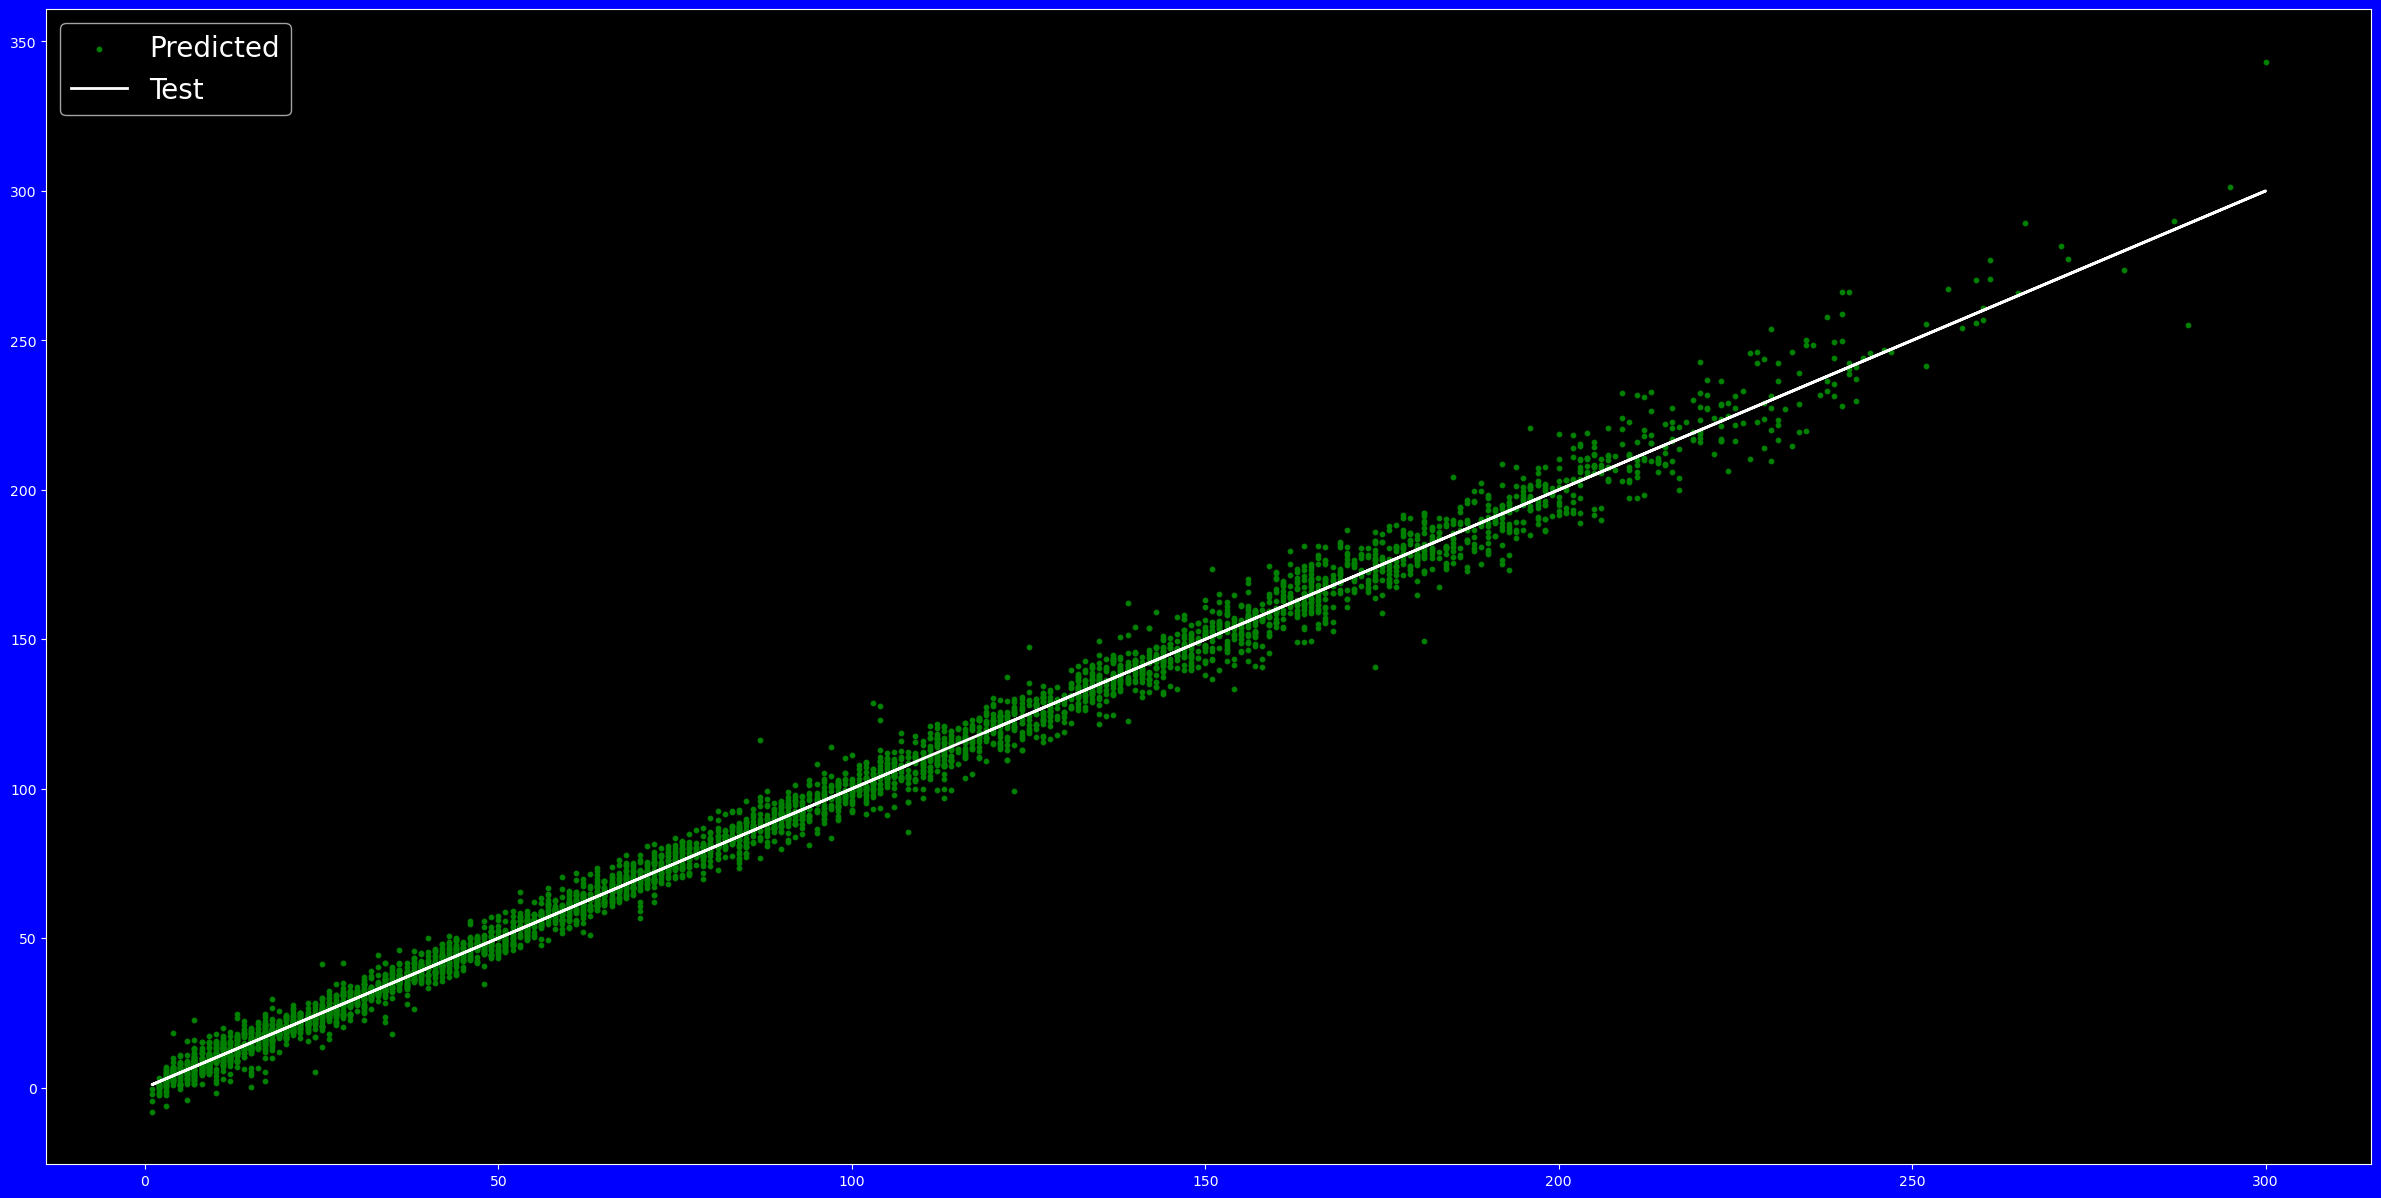

In [40]:
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(30,15),facecolor='b',edgecolor='g')

plt.scatter(ytest,ypred ,s=10,c='g',label='Predicted') 
plt.plot(ytest,ytest,'white' ,label='Test' ,linewidth=2.0)
plt.legend(fontsize=20)
plt.show()